# **Ý NGHĨA BIẾN TRONG DATASET:**

* age: độ tuổi (số)
* job : nghề nghiệp (phân loại: quản trị viên, công nhân, kinh doanh, giúp việc, quản lý, về hưu, tự làm chủ, dịch vụ, học sinh, kỹ thuật , thất nghiệp)
* marital : tình trạng hôn nhân (phân loại: đã ly hôn, kết hôn, độc thân)
* education: trình độ bậc giáo dục (phân loại: cơ bản, THPT, thất học, chuyên nghiệp, đại học)
* default: có vỡ nợ hay không? (phân loại: có, không)
* housing: có khoản vay nhà ở hay không? (phân loại: có, không)
* loan: có khoản vay cá nhân hay không? (phân loại: có, không)
Liên hệ cuối cùng của chiến dịch hiện tại:
* contact: loại liên lạc (phân loại: di dộng, điện thoại)
* month: tháng liên lạc cuối cùng trong năm (phân loại: 1, 2, 3,...)
* day_of_week: ngày liên lạc cuối cùng trong tuần (thứ 2,3,4,5,6)
* duration: thời hạn liên lạc cuối cùng, tính bằng giây (số). Lưu ý quan trọng: thuộc tính này ảnh hưởng cao đến mục tiêu đầu ra (VD: nếu thời lượng = 0 thì y = 'không'). Tuy nhiên, thời lượng không được biết đến trước khi một cuộc gọi được thực hiện. Ngoài ra, sau khi kết thúc cuộc gọi 'y' rõ ràng được biết đến. Ngoài ra, đầu vào này chỉ nên được đưa vào cho các mục đích điểm chuẩn và nên được loại bỏ nếu ý định là có mô hình dự đoán thực tế.
Các thuộc tính khác:
* campaign: số lượng liên hệ được thực hiện trong chiến dịch này và cho máy của khách (số, gồm liên hệ cuối cùng)
* pdays: số ngày trôi qua sau khi khách hàng được liên hệ lần cuối từ 1 chiến dịch trước đó (số, 999 nghĩa là máy của khách không được liên hệ trước đó)
* previous: số lượng liên hệ được thực hiên trước chiến dịch và cho máy của khách (số)
* poutcome: kết quả của chiến dịch tiếp thị trước đó (phân loại: thất bại, thành công, không tham gia)
Các thuộc tính bối cảnh xã hội và kinh tế:
* emp.var.rate: tỷ lệ biến đổi việc làm - hàng quý (số)
* cons.price.idx: chỉ số giá tiêu dùng - hàng tháng (số)
* cons.conf.idx: chỉ số niềm tin của người tiêu dùng - hàng tháng (số)
* euribor3m: tỷ lệ 3 tháng lãi suất tham chiếu euro liên ngân hàng - hàng (số)
* nr.employed: số lượng nhân viên - hàng quý (số)
* Biến đầu ra (mục tiêu mong muốn):
* y - Khách hàng đã đăng ký một khoản tiền gửi có kỳ hạn chưa? (phân loại: có, không)



# **I. Import các thư viện liên quan**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly
from plotly.offline import iplot

# Import các thư viện cần thiết
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import tree


# **II. Load dữ liệu vào Dataframe**

In [ ]:
df = pd.read_csv('bank-additional-full.csv', sep=",")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# **III. EDA**

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Thông tin dữ liệu (cột, hàng, kiểu dữ liệu)**

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
list(df)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

Kết quả: Tập dữ liệu chứa 21 cột

In [ ]:
df.shape

(41188, 21)

Kết quả: Tập dữ liệu chứa 41188 hàng và 21 cột

In [ ]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Kết quả:
Dữ liệu chứa 11 biến phân loại và 10 biến số

## **Phân tích mọi điểm bất thường trong dữ liệu**

**Mô tả dữ liệu**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


Nhận xét:
* Hầu hết các cột trong bộ dữ liệu đều lệch phải. Độ lệch chuẩn lớn
* Giá trị ngoại lệ ở các cột duration, age lớn. Cần xử lý trước khi đưa vào mô hình để tránh gây sai lệch kết quả.

**Outlier**

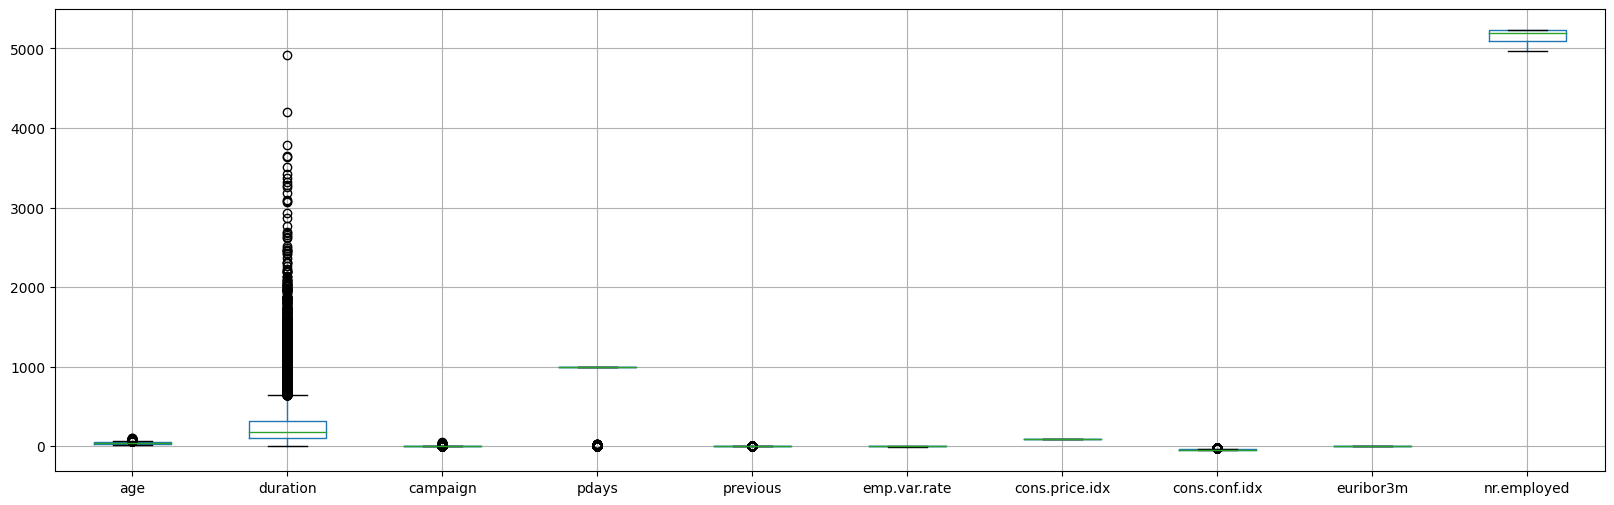

In [ ]:
plt.figure(figsize=(20,6))
df.boxplot()
print()

Nhận xét: Xuất hiện outlier ở những cột age, duration. Cần xử lý chúng.

**Phân phối**

<ipython-input-10-d9db9314723a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




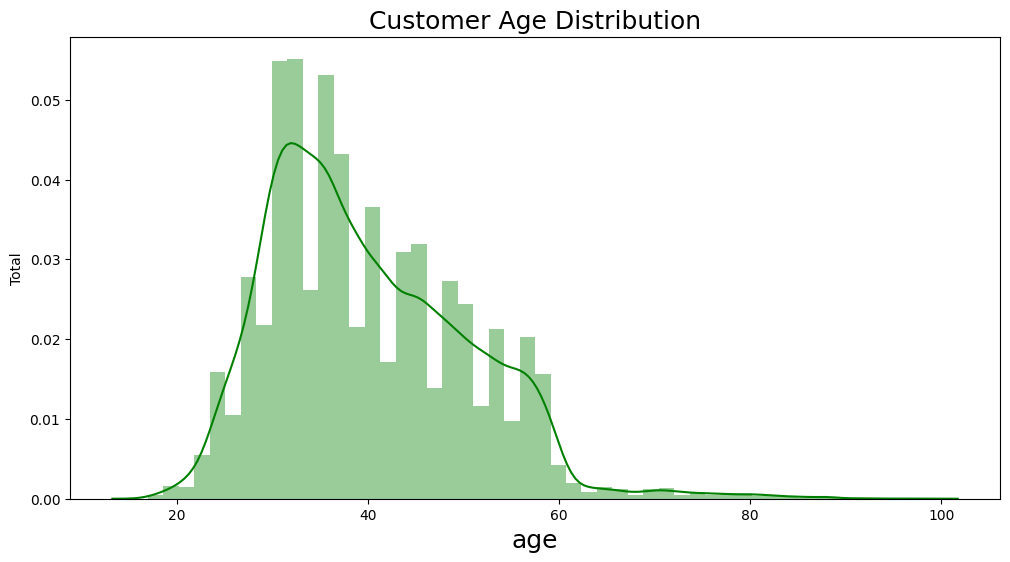

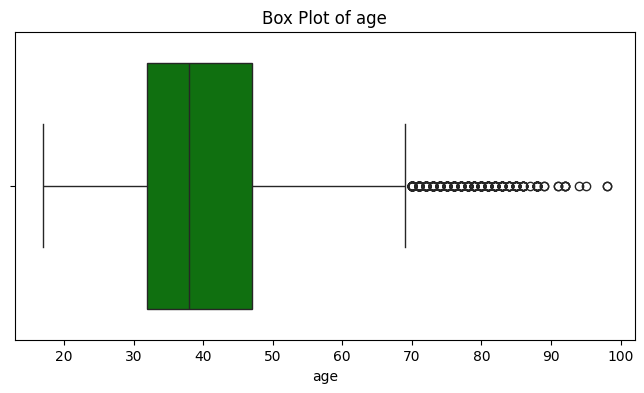

<ipython-input-10-d9db9314723a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




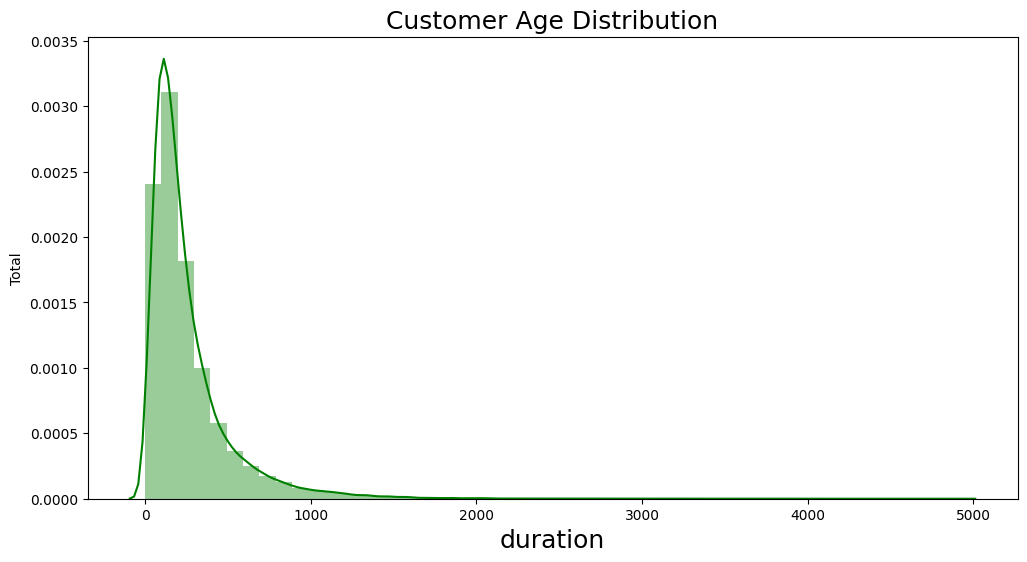

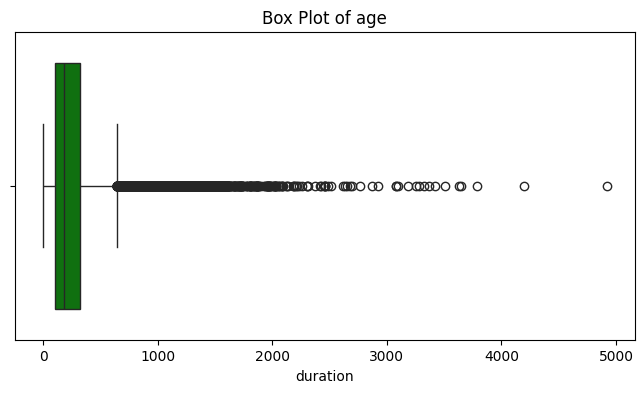

<ipython-input-10-d9db9314723a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




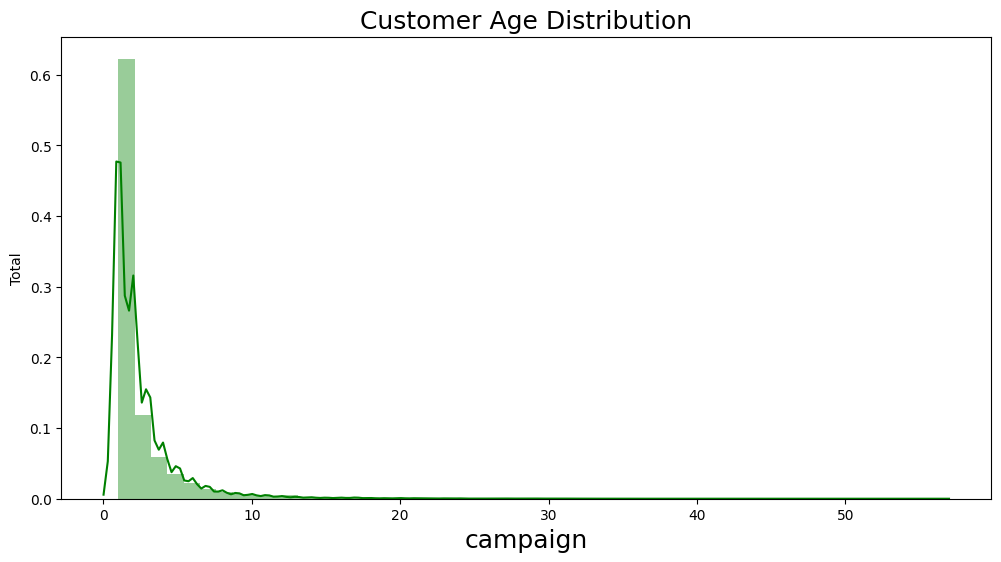

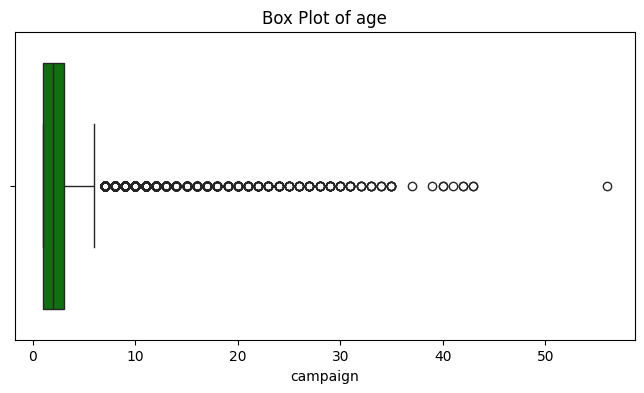

<ipython-input-10-d9db9314723a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




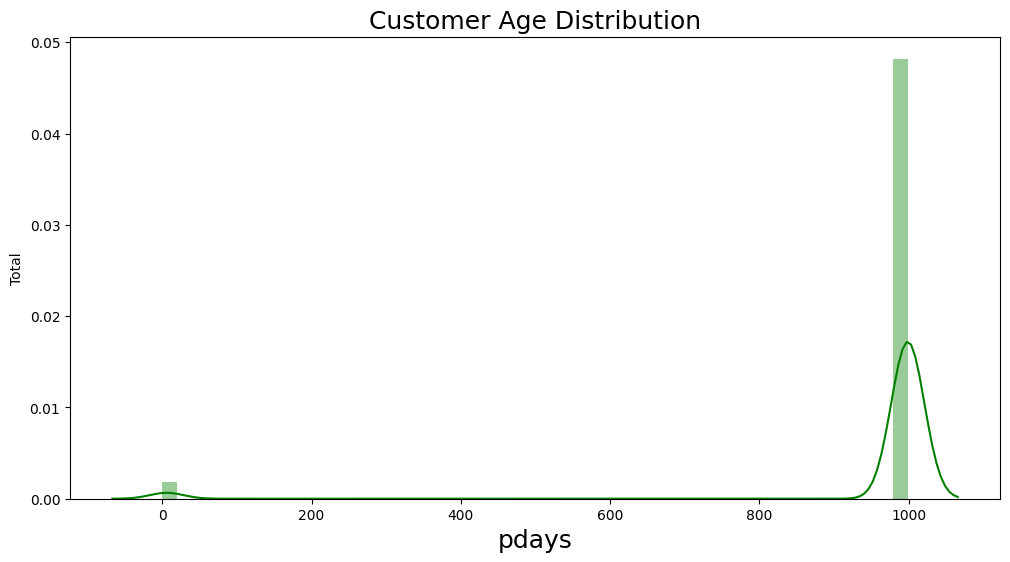

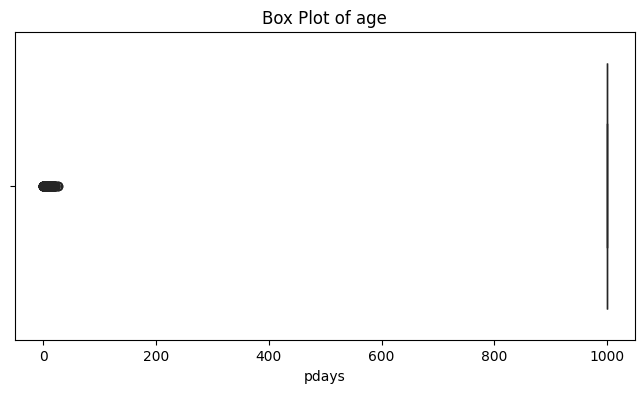

<ipython-input-10-d9db9314723a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




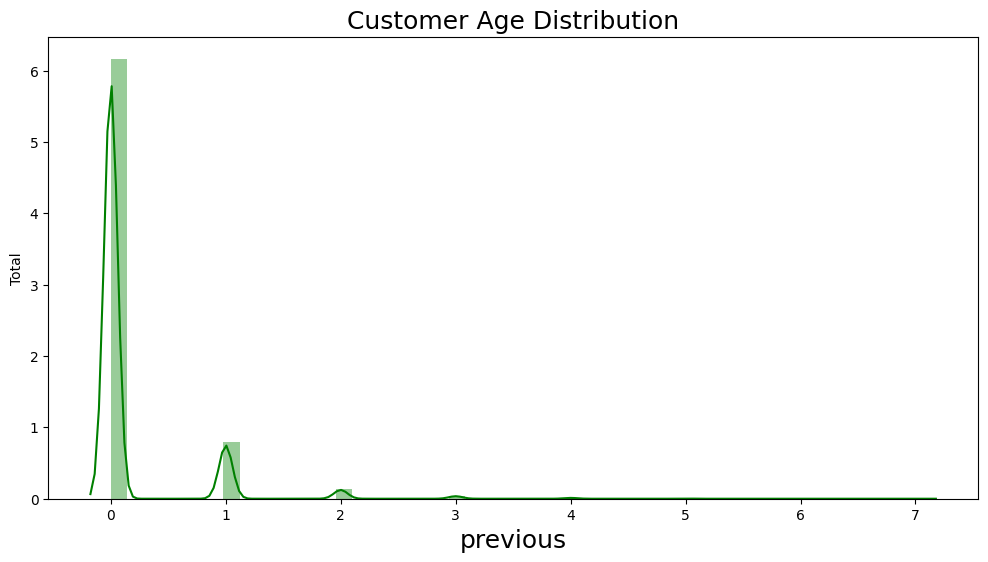

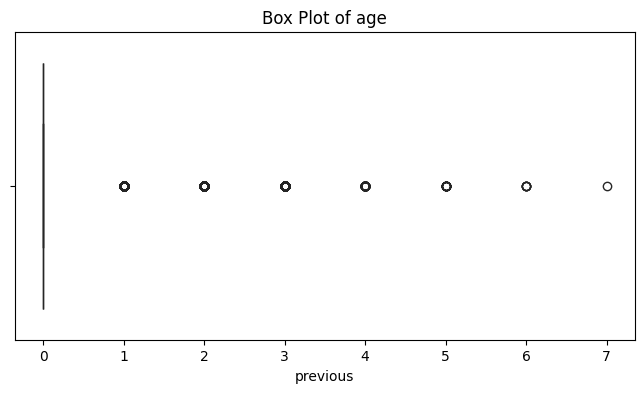

<ipython-input-10-d9db9314723a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




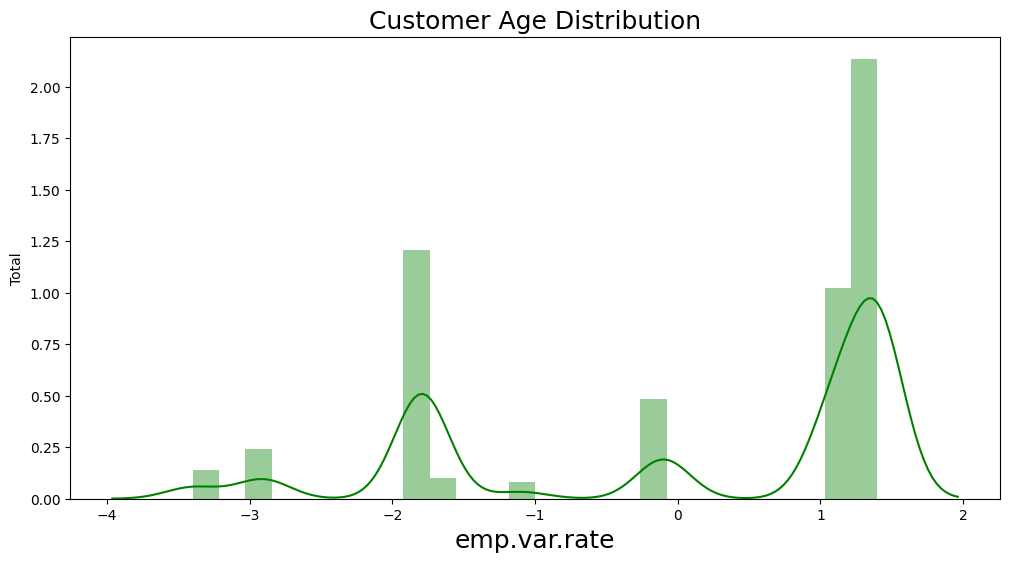

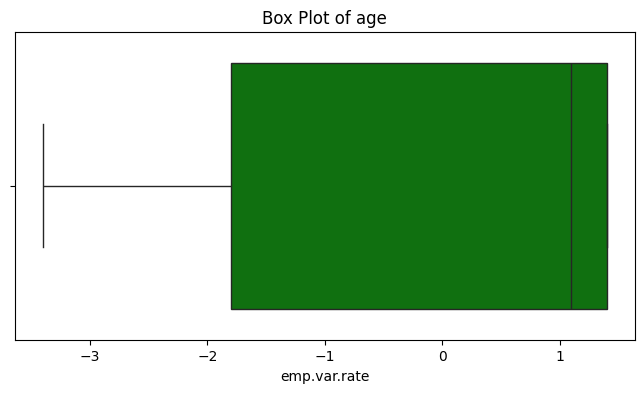

<ipython-input-10-d9db9314723a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




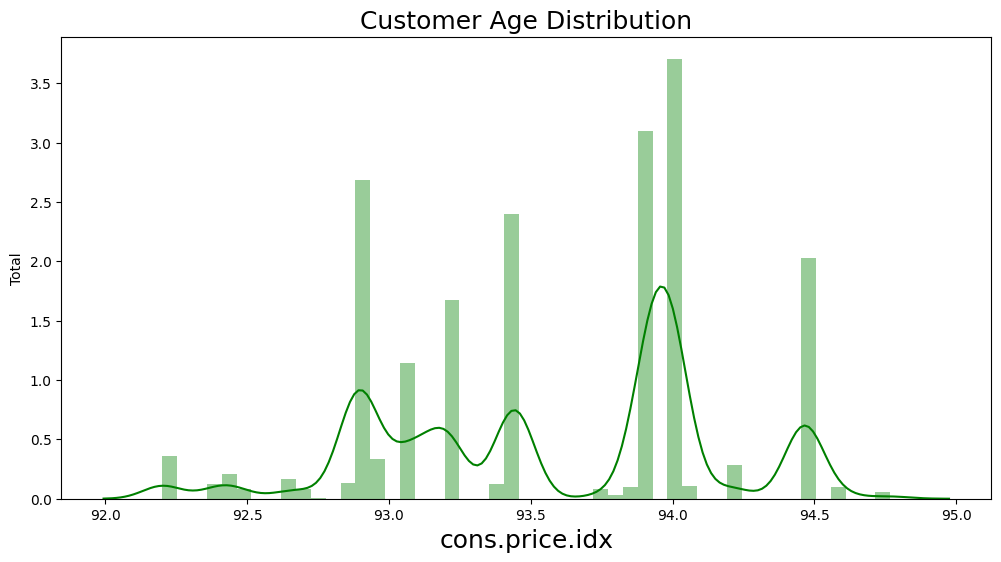

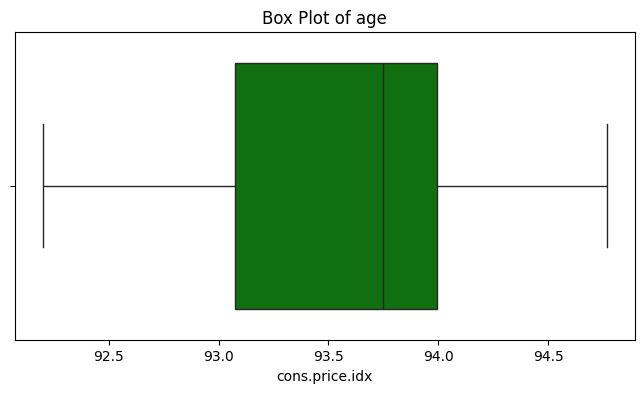

<ipython-input-10-d9db9314723a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




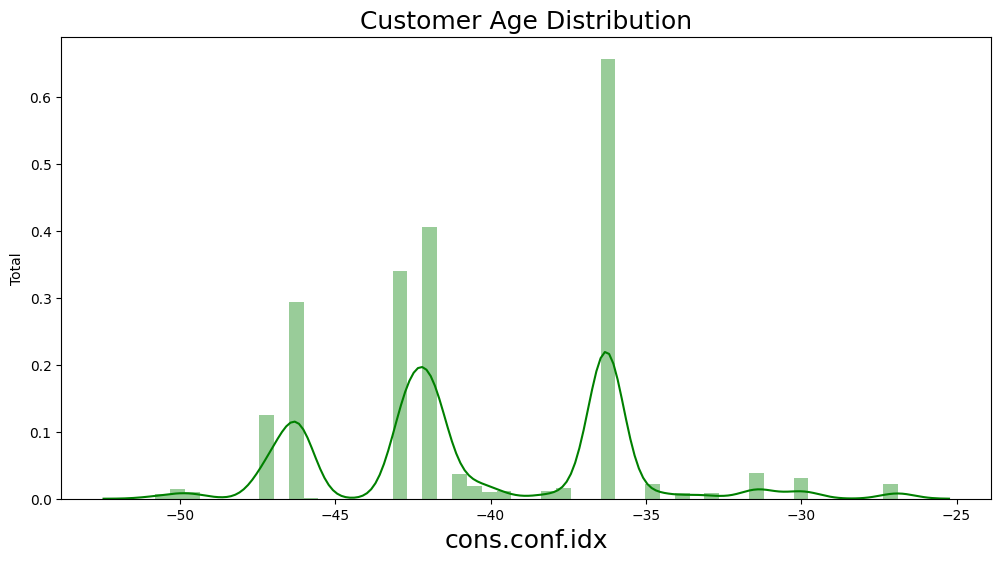

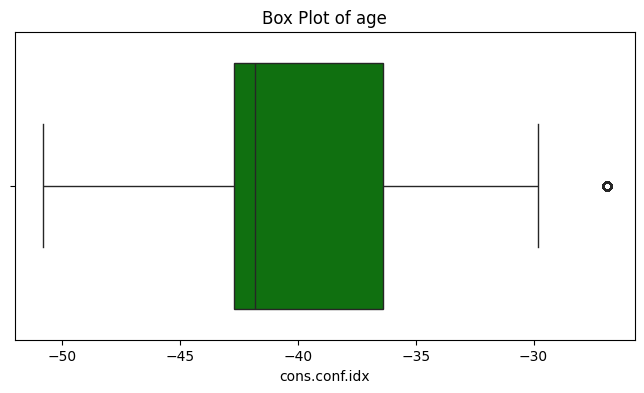

<ipython-input-10-d9db9314723a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




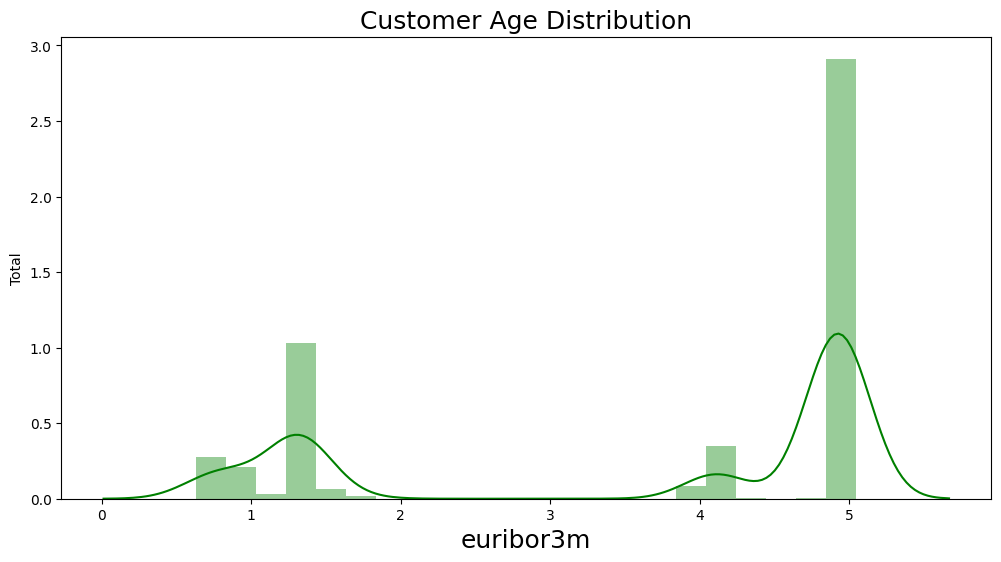

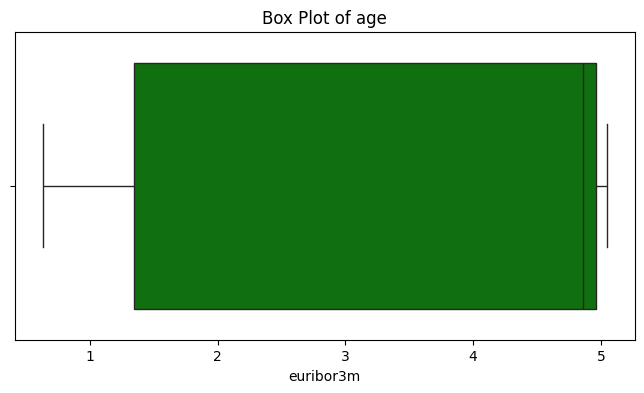

<ipython-input-10-d9db9314723a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




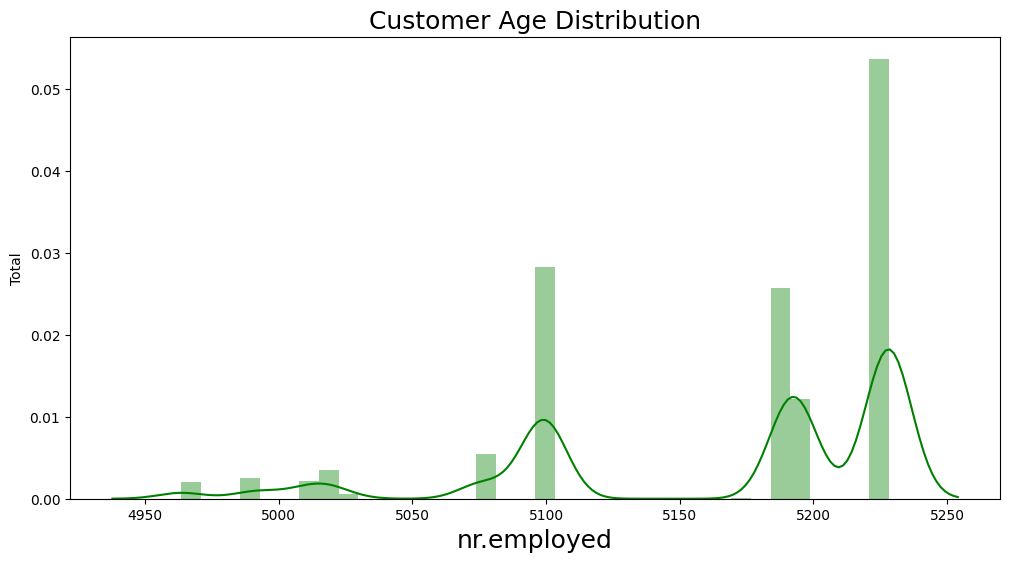

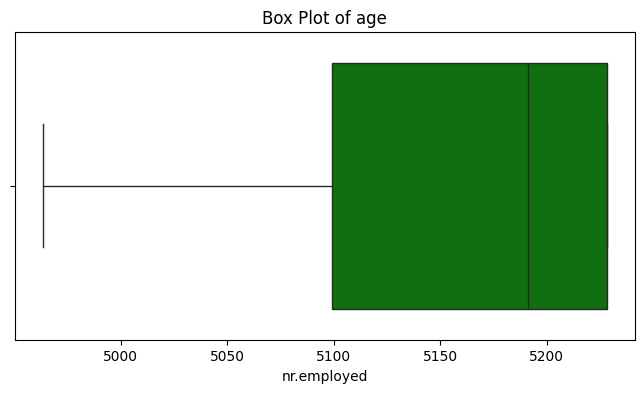

In [ ]:
num_variables = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_variables:
   plt.figure(figsize=(12,6))
   sns.distplot(df[col], color = 'green')
   plt.title('Customer Age Distribution', fontsize = 18)
   plt.xlabel(col, fontsize = 18)
   plt.ylabel('Total')
   plt.show()

   plt.figure(figsize=(8, 4))
   sns.boxplot(x=df[col], color = 'green')
   plt.title('Box Plot of age')
   plt.xlabel(col)
   plt.show()

**Kiểm tra giá trị trùng lập**

In [ ]:
print('Tổng số dòng: ',df.shape[0])
print('Tổng số cột: ',df.shape[1])
dupplicate_row = len(df)-len(df.drop_duplicates())
print('Số dòng bị trùng lặp: ',dupplicate_row)

Tổng số dòng:  41188
Tổng số cột:  21
Số dòng bị trùng lặp:  12


**Missing values**

Trong tập dữ liệu này, có các điểm dữ liệu có giá trị 'không xác định'. Chúng tôi sẽ trao đổi những giá trị này với các giá trị NaN và loại bỏ chúng

In [ ]:
df.replace('unknown', np.NaN, inplace=True)

In [ ]:
df.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Nhận xét: có giấ trị khuyết ở những cột job, marital, education, default, housing, loan

**Hiển thị từng giá trị và đếm số lượng của mỗi giá trị của mỗi cột**

In [ ]:
for col in list(df.columns):
    print("\nfor column : ", col,"\n")
    print(df[col].value_counts())


for column :  age 

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

for column :  job 

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

for column :  marital 

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

for column :  education 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

for column :  default 

no     32588
yes        3
Name: default, dtype: int64

for column :  housing 

yes    21576
no     18622
Name: housing, dtype: int64

**Giá trị duy nhất của tất cả các biến phân loại**

In [ ]:
df_obj = df.select_dtypes('object')
df_uniques = pd.DataFrame([[i, len(df_obj[i].unique())] for i in df_obj.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5


Những cột phân loại sẽ được mã hóa thành số bằng cách sử dụng kỹ thuật Dummy encoding

# **IV. PREPROCESSING**

**Xóa các hàng có giá trị NaN**
    

In [ ]:
df.dropna(how='any', inplace=True)
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**Loại bỏ các bản ghi trùng lặp**
   

In [ ]:
df.drop_duplicates(keep=False, inplace=True)
dupplicate_row = len(df)-len(df.drop_duplicates())
print('Số dòng bị trùng lặp: ',dupplicate_row)

Số dòng bị trùng lặp:  0


**Xử lý outlier biến Price**



In [ ]:
    continuous_column_list = ['age']

    for column_name in continuous_column_list:
        while True:
             Q1 = df[column_name].quantile(0.25)
             Q3 = df[column_name].quantile(0.75)
             IQR = Q3 - Q1

             df_cleaned_outlier = df[~((df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR)))]

             if len(df_cleaned_outlier) == len(df):
                 break
             df = df_cleaned_outlier
    print(df.shape[0])
    print(df.shape[1])


30012
21


In [ ]:
    continuous_column_list = ['duration']

    for column_name in continuous_column_list:
        while True:
             Q1 = df[column_name].quantile(0.25)
             Q3 = df[column_name].quantile(0.75)
             IQR = Q3 - Q1

             df_cleaned_outlier = df[~((df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR)))]

             if len(df_cleaned_outlier) == len(df):
                 break
             df = df_cleaned_outlier
    print(df.shape[0])
    print(df.shape[1])


26275
21


**Drop những cột không có ý nghĩa cho mô hình:**

In [ ]:
df1=df.drop(columns=['day_of_week','month','contact','poutcome','pdays'],axis=1)
df1

,age,job,marital,education,default,housing,loan,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,151,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,307,1,0,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,139,1,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,281,1,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,112,1,1,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,no


**Thay thế giá trị những cột có giá trị yes, no thành 1 và 0**

In [ ]:

df1.y.replace(('yes', 'no'), (1, 0), inplace=True)
df1.default.replace(('yes', 'no'), (1, 0), inplace=True)
df1.housing.replace(('yes', 'no'), (1, 0), inplace=True)
df1.loan.replace(('yes', 'no'), (1, 0), inplace=True)
df1

,age,job,marital,education,default,housing,loan,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,0,0,0,139,1,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,0,1,0,281,1,0,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29,unemployed,single,basic.4y,0,1,0,112,1,1,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46,blue-collar,married,professional.course,0,0,0,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0,1,0,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,0


In [ ]:
df1.default.replace(('unknown'), np.NaN, inplace = True)
df1.dropna(how='any', inplace=True)
df1.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
duration          0
campaign          0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**Dummy decoding - mã hóa biến phân loại**

In [ ]:
df2 = pd.get_dummies(df1)
df2.head()

,age,default,housing,loan,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,0,0,0,261,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,0,0,0,0
2,37,0,1,0,226,1,0,1.1,93.994,-36.4,...,0,1,0,0,0,0,1,0,0,0
3,40,0,0,0,151,1,0,1.1,93.994,-36.4,...,0,1,0,0,1,0,0,0,0,0
4,56,0,0,1,307,1,0,1.1,93.994,-36.4,...,0,1,0,0,0,0,1,0,0,0
6,59,0,0,0,139,1,0,1.1,93.994,-36.4,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,26275.0,38.461808,9.331374,17.000,31.000,36.000,45.000,66.000
default,26275.0,0.000114,0.010685,0.000,0.000,0.000,0.000,1.000
housing,26275.0,0.543406,0.498122,0.000,0.000,1.000,1.000,1.000
loan,26275.0,0.156689,0.363514,0.000,0.000,0.000,0.000,1.000
duration,26275.0,182.322626,113.730354,0.000,94.000,159.000,252.000,489.000
campaign,26275.0,2.547441,2.791488,1.000,1.000,2.000,3.000,43.000
previous,26275.0,0.187897,0.511546,0.000,0.000,0.000,0.000,7.000
emp.var.rate,26275.0,-0.034204,1.593558,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,26275.0,93.527568,0.580488,92.201,93.075,93.444,93.994,94.767
cons.conf.idx,26275.0,-40.625522,4.711673,-50.800,-42.700,-41.800,-36.400,-26.900


# **IV. VISUALIZATION**

**Nhóm độ tuổi nào sử dụng giao dịch ngân hàng nhiều nhất?**

In [ ]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

age_labels = ['0-10','10-20', '20-30', '30-40', '40-50', "50-60","60-70", "70-80", "80-90","90-100"]

df_visual = df

df_visual['groupage'] = pd.cut(df['age'], age_bins, labels = age_labels, right = True, include_lowest = True)

df_visual.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,groupage
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-60
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30-40
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30-40
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-60
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-60
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,20-30
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,20-30
11,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,20-30
12,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,20-30
13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-60


In [ ]:
count_groupage = df['groupage'].value_counts()
count_groupage

30-40     11416
40-50      5926
20-30      5290
50-60      3335
60-70       235
10-20        73
0-10          0
70-80         0
80-90         0
90-100        0
Name: groupage, dtype: int64

<Axes: xlabel='None'>

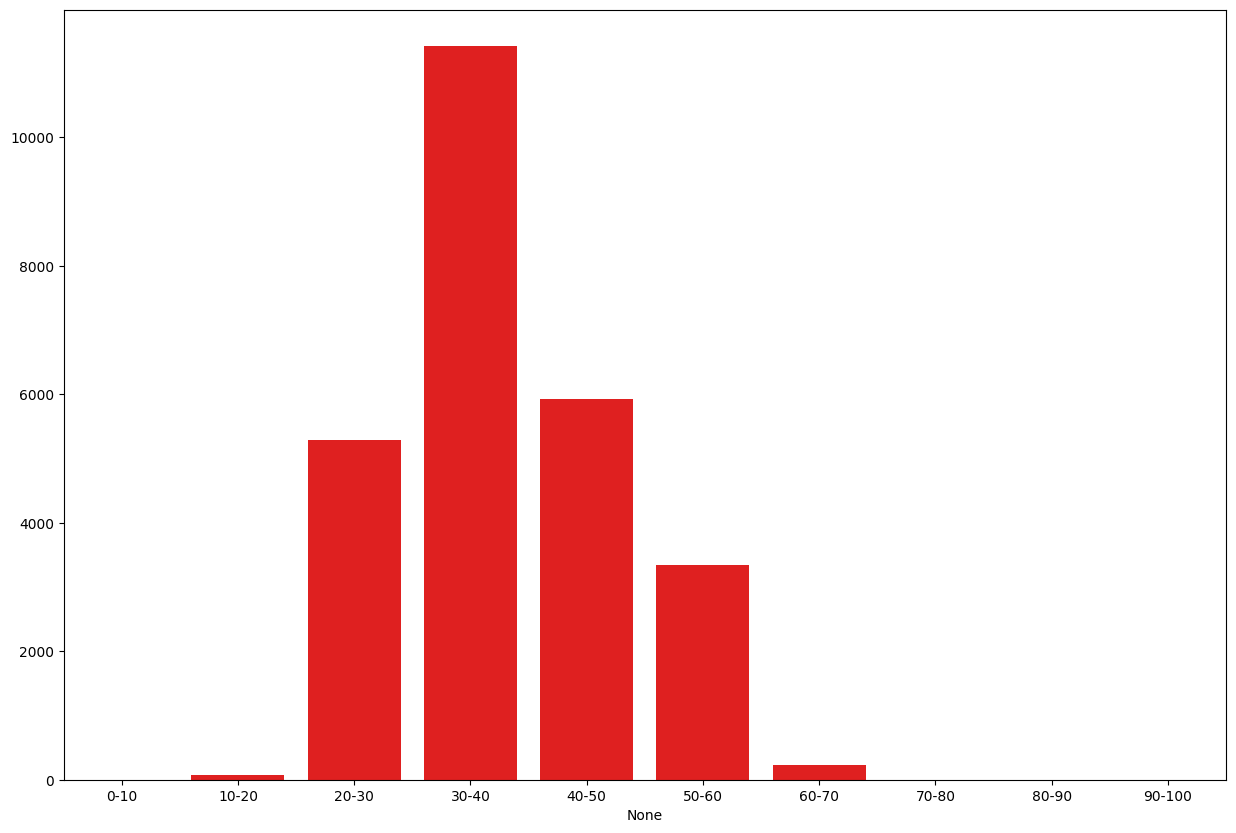

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=count_groupage.index, y=count_groupage.values, color = 'red')


Nhận xét: Nhóm độ tuổi từ 30 - 40 có tỉ lệ sử dụng cao nhất

**Khách hàng trong ngân hàng đa số trong tình trạng hôn nhân như thế nào?**

In [ ]:
count_marital = df['marital'].value_counts().sort_values()
count_marital

divorced     2994
single       8255
married     15026
Name: marital, dtype: int64

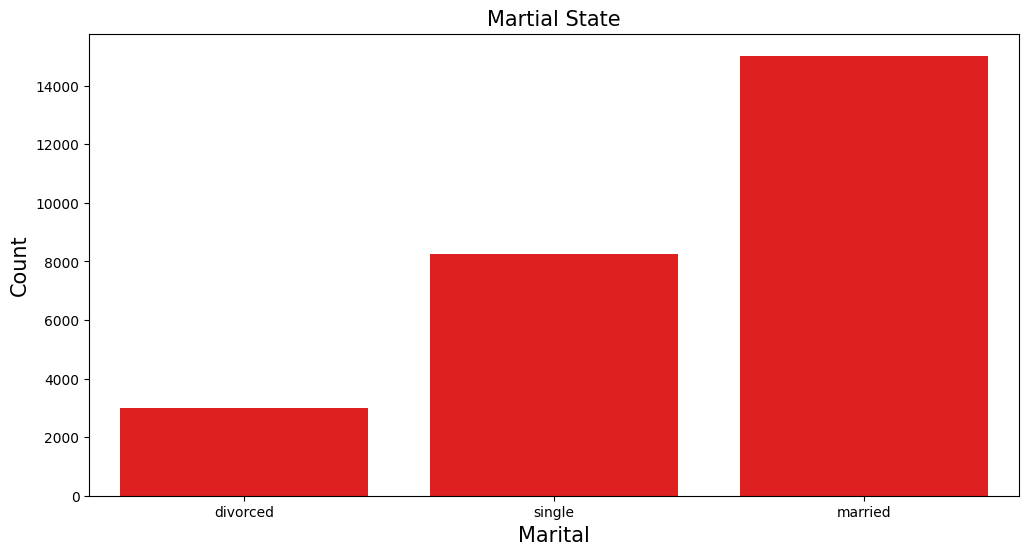

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='marital', order=df['marital'].value_counts().index[::-1], color='red')
plt.title('Martial State', fontsize=15)
plt.xlabel('Marital', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Nhận xét:
Khách hàng của ngân hàng đa số là những người đã lập gia đình

**Trong ngân hàng, nghề nghiệp của khách hàng thường là công việc gì?**

In [ ]:
count_job = df['job'].value_counts().sort_values()
count_job

student           520
housemaid         591
unemployed        654
retired           678
entrepreneur      943
self-employed     949
management       2026
services         2476
technician       4824
blue-collar      4954
admin.           7660
Name: job, dtype: int64

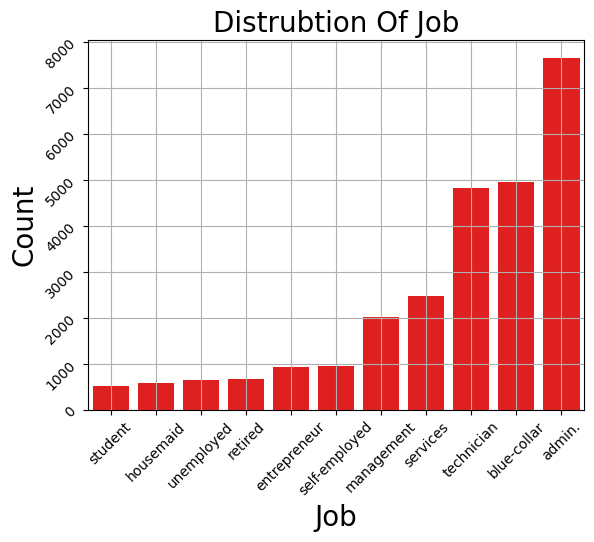

In [ ]:
sns.countplot(data=df, x='job', order=df['job'].value_counts().index[::-1], color='red')
plt.grid(True)
plt.title('Distrubtion Of Job',fontsize=20)
plt.xlabel('Job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Nhận xét: Công việc của khách hàng đa số là quản trị viên, công ngân và kỹ thuật viên

**Kách hàng vỡ nợ trong ngân hàng nhiều hay ít?**


In [ ]:
count_default = df['default'].value_counts().sort_values()
count_default

yes        3
no     26272
Name: default, dtype: int64

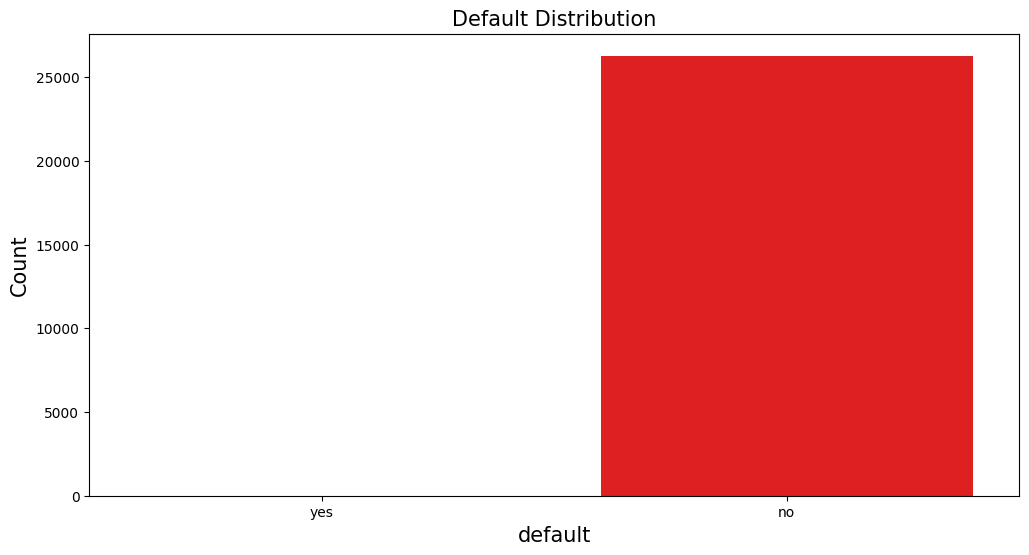

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='default', order=df['default'].value_counts().index[::-1], color='red')
plt.title('Default Distribution', fontsize=15)
plt.xlabel('default', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Nhận xét: Xác xuất để vỡ nợ là rất thấp, chỉ có 1 số người không có khả năng thanh đúng hạn

**Trình độ bậc giáo dục phổ biến của khách hàng trong ngân hàng?**

In [ ]:
count_education = df['education'].value_counts().sort_values()
count_education

illiterate               10
basic.6y               1210
basic.4y               1864
basic.9y               3699
professional.course    3753
high.school            6658
university.degree      9081
Name: education, dtype: int64

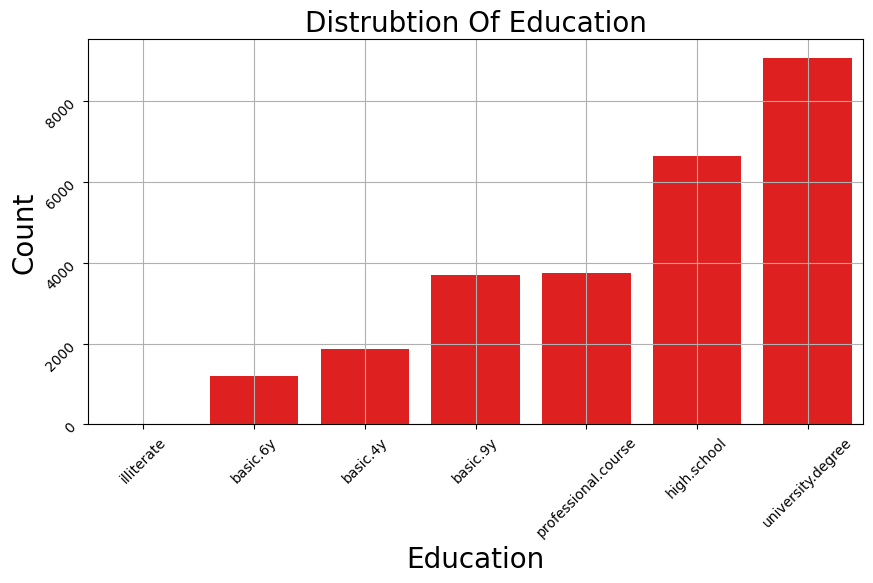

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index[::-1], color='red')
plt.grid(True)
plt.title('Distrubtion Of Education',fontsize=20)
plt.xlabel('Education',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Khách hàng đã số là những người đã tốt nghiệp cấp 3 trở lên

**Khoản vay cá nhân của khách hàng trong ngân hàng nhiều hay ít?**

In [ ]:
count_loan = df['loan'].value_counts().sort_values()
count_loan

yes     4117
no     22158
Name: loan, dtype: int64

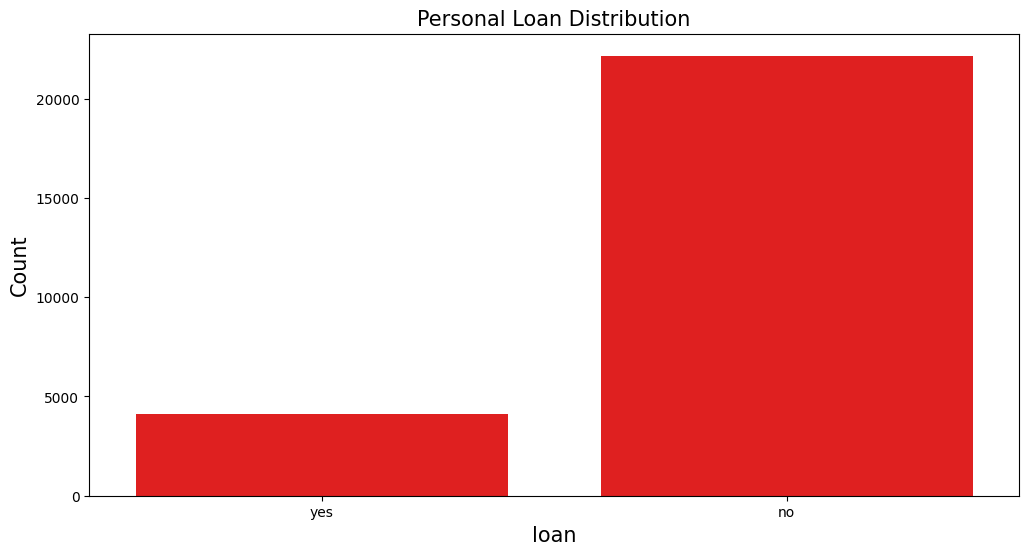

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='loan', order=df['loan'].value_counts().index[::-1], color='red')
plt.title('Personal Loan Distribution', fontsize=15)
plt.xlabel('loan', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Khách hàng ít khi vay ngân hàng

**Khoản vay mua nhà (khoản vay thế chấp) của khách hàng**

In [ ]:
count_housing = df['housing'].value_counts().sort_values()
count_housing

no     11997
yes    14278
Name: housing, dtype: int64

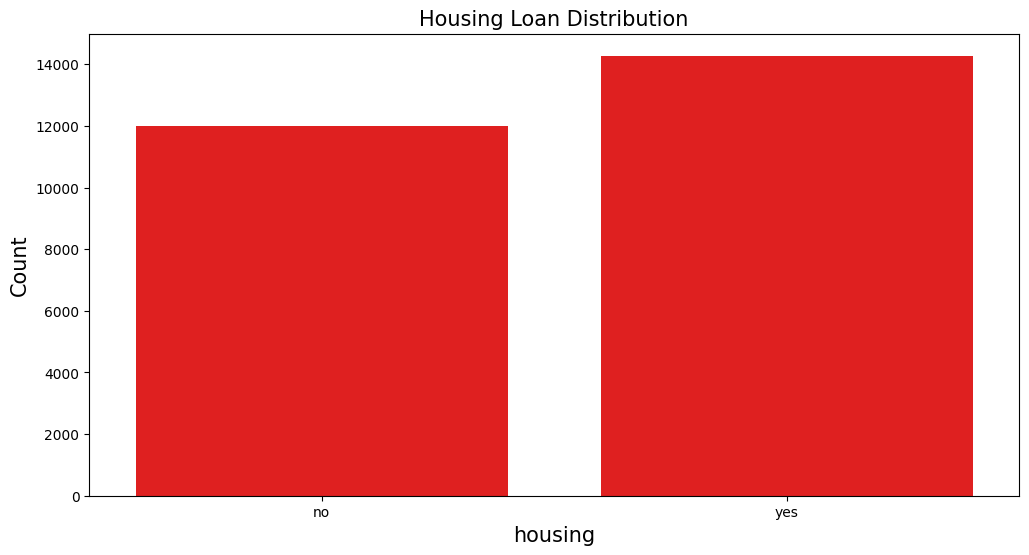

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='housing', order=df['housing'].value_counts().index[::-1], color='red')
plt.title('Housing Loan Distribution', fontsize=15)
plt.xlabel('housing', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [ ]:
count_campaign = df['campaign'].value_counts().sort_values()
count_campaign

43        1
39        1
37        1
41        1
34        2
40        2
42        2
33        3
26        3
32        4
35        4
28        5
31        5
25        6
30        7
27        7
29        7
24       10
22       10
23       12
21       14
19       17
20       21
18       23
16       27
15       29
17       34
14       45
13       48
12       78
11      106
10      149
9       168
8       253
7       382
6       615
5      1029
4      1694
3      3314
2      6673
1     11463
Name: campaign, dtype: int64

**Kết quả của chiến dịch marketing trước đó?**

In [ ]:
count_poutcome = df['poutcome'].value_counts().sort_values()
count_poutcome

success          938
failure         2989
nonexistent    22348
Name: poutcome, dtype: int64

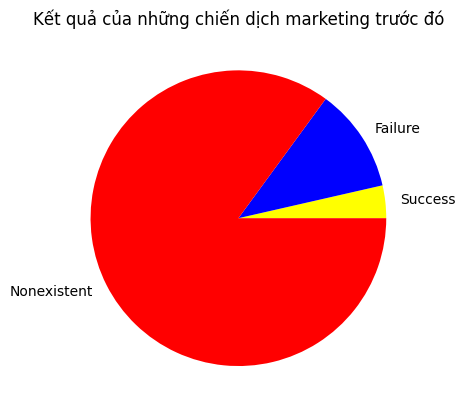

In [ ]:
labels = ['Success', 'Failure', 'Nonexistent']
colors = ["yellow", "blue", "red"]
plt.title('Kết quả của những chiến dịch marketing trước đó')
plt.pie(count_poutcome, labels=labels, colors=colors)
plt.show()

Nhận xét: Tỉ lệ lệ thành công chiếm tỉ trọng rất ít, hiệu quả của chiến dịch marketing chưa thực sự tốt

**Mục tiêu mong muốn của ngân hàng (Đầu ra): Lượng khách đã đăng ký một khoản tiền gửi có thời hạn**

In [ ]:
count_y = df['y'].value_counts().sort_values()
count_y

yes     2038
no     24237
Name: y, dtype: int64

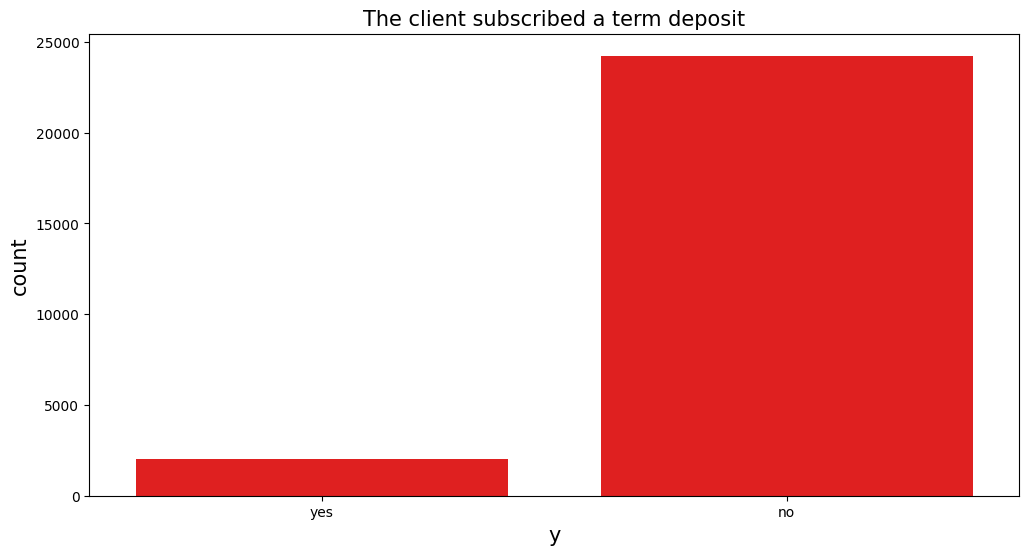

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='y', order=df['y'].value_counts().index[::-1], color='red')
plt.title('The client subscribed a term deposit', fontsize=15)
plt.xlabel('y', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

Nhận xét: Lượng khách hàng đã ký kết một khoản tiền gửi có kỳ hạn là rất ít

# **V. MODEL (LOGISTIC REGRESSION)**

**Chênh lệch giữa biến Y**




In [ ]:
countY = df['y'].value_counts()
countY

no     24237
yes     2038
Name: y, dtype: int64

<Axes: xlabel='None'>

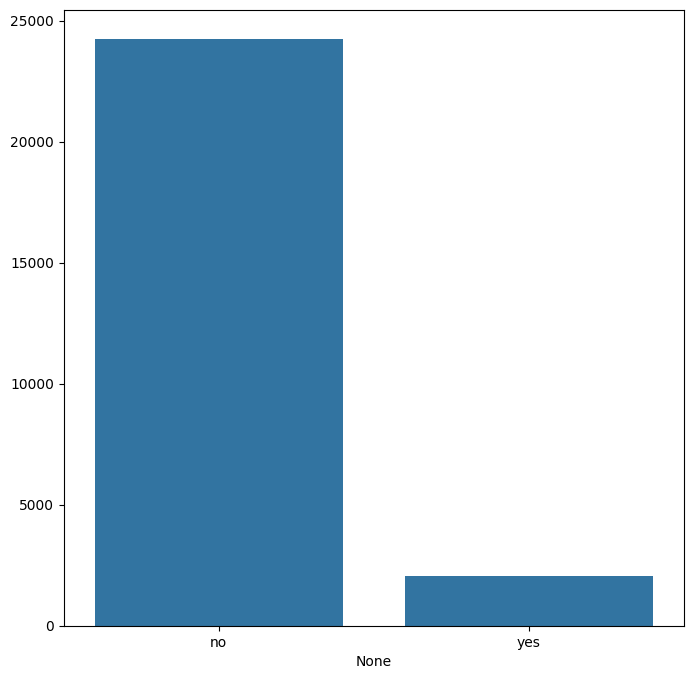

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x=countY.index, y=countY.values)

### **Correlation**

In [ ]:
dfy = df2.corr()['y']
dfy

age                             -0.004028
default                         -0.003099
housing                          0.017293
loan                            -0.011090
duration                         0.238476
campaign                        -0.077053
previous                         0.279283
emp.var.rate                    -0.364282
cons.price.idx                  -0.159143
cons.conf.idx                    0.096498
euribor3m                       -0.368078
nr.employed                     -0.433416
y                                1.000000
job_admin.                       0.043474
job_blue-collar                 -0.080120
job_entrepreneur                -0.023057
job_housemaid                   -0.003685
job_management                   0.001523
job_retired                      0.055111
job_self-employed                0.001824
job_services                    -0.038985
job_student                      0.112032
job_technician                  -0.007413
job_unemployed                   0

<Axes: >

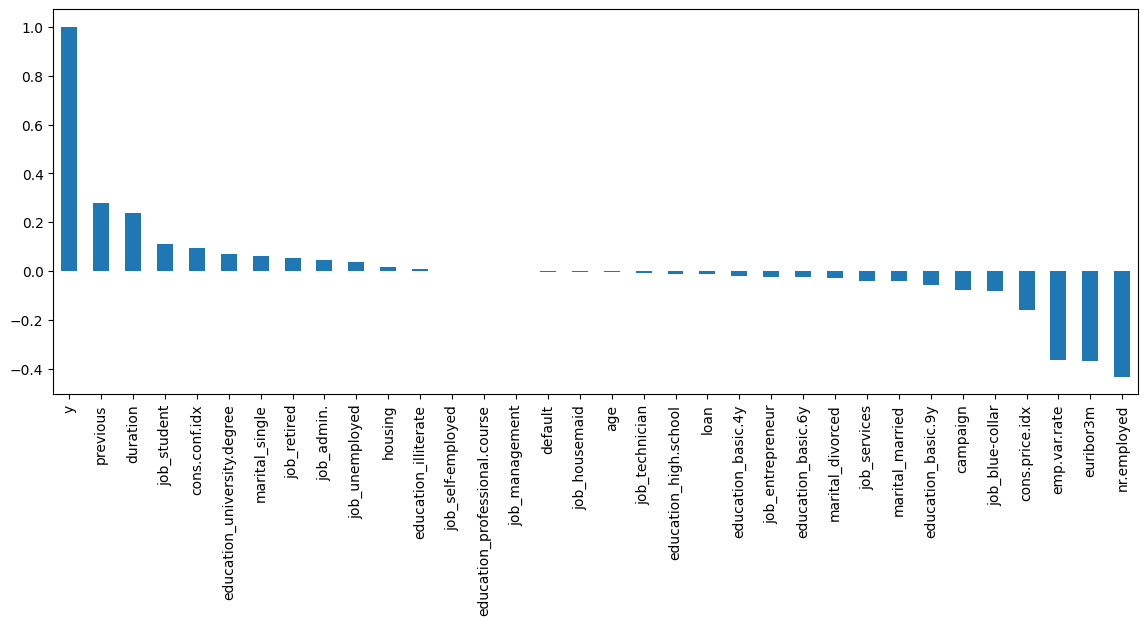

In [ ]:
plt.figure(figsize=(14,5))
dfy.sort_values(ascending = False).plot(kind='bar')

### **Model**

In [ ]:
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26275 entries, 0 to 41186
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            26275 non-null  int64  
 1   default                        26275 non-null  int64  
 2   housing                        26275 non-null  int64  
 3   loan                           26275 non-null  int64  
 4   duration                       26275 non-null  int64  
 5   campaign                       26275 non-null  int64  
 6   previous                       26275 non-null  int64  
 7   emp.var.rate                   26275 non-null  float64
 8   cons.price.idx                 26275 non-null  float64
 9   cons.conf.idx                  26275 non-null  float64
 10  euribor3m                      26275 non-null  float64
 11  nr.employed                    26275 non-null  float64
 12  y                              26275 non-null 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Iteration 0, Cost: 0.6931471805599452
Iteration 100, Cost: 0.7882189194099944
Iteration 200, Cost: 0.7492825180791831
Iteration 300, Cost: 0.7090689702858909
Iteration 400, Cost: 0.6679550523098322
Iteration 500, Cost: 0.626359306771245
Iteration 600, Cost: 0.5849523167612085
Iteration 700, Cost: 0.5456295893918663
Iteration 800, Cost: 0.5167417790398883
Iteration 900, Cost: 0.5038567020291623


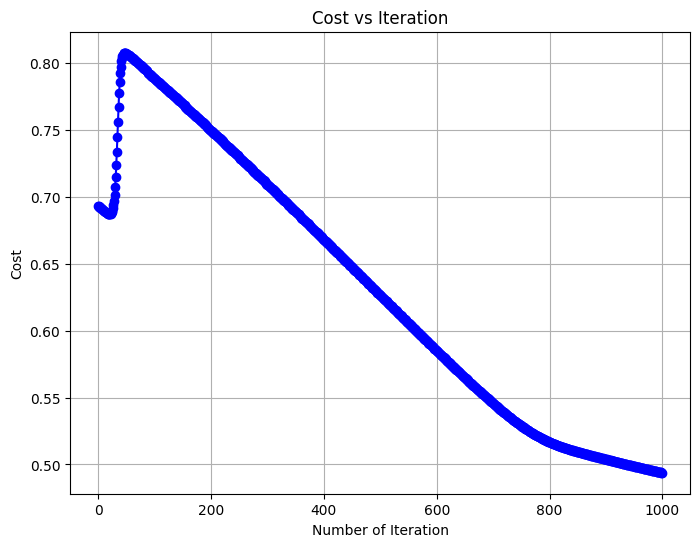

Confusion Matrix:
[[12296  4696]
 [ 1005 15987]]

Metrics:
Accuracy: 0.83
Precision: 0.77
Recall: 0.94
F1 Score: 0.85


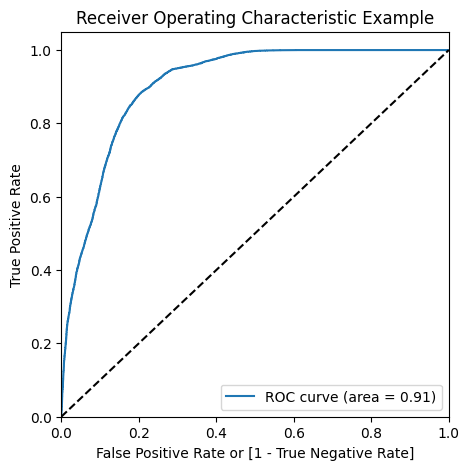


Training Accuracy: 0.83
Optimal Cutoff for Test Data: 0.50
Test Accuracy with Optimal Cutoff: 0.75
Model Parameters:
housing: 0.00043035624715000707
loan: -0.025272558616789467
duration: -0.024045897888566814
campaign: 0.18503877472618888
emp.var.rate: -0.05535200287165212
cons.price.idx: -0.3928501693349118
job_admin.: -0.004621073801779943
job_blue-collar: 0.0016841409698247069
job_management: -0.03465227649953558
job_services: -0.010517005494662808
marital_divorced: -0.01722173153176197
marital_married: -0.01793328887650135
marital_single: -0.025552760014381858
education_basic.4y: 0.00411745153471345
education_basic.9y: -0.011595634671691817
education_high.school: -0.02603189253962911
Bias: 0.0004303562471500076

Result DataFrame:
      housing  loan  duration  campaign  emp.var.rate  cons.price.idx  \
4135      1.0   0.0 -0.011522 -0.185165           1.1          93.994   
3023      1.0   0.0  0.446710 -0.185165           1.1          93.994   
1803      0.0   0.0 -0.478566 -0.555

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn import metrics

class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, num_iterations=5000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_weights_and_bias(self, num_features):
        self.weights = np.zeros((num_features, 1))
        self.bias = 0

    def compute_cost(self, y, y_pred):
        m = y.shape[0]
        cost = -1 / m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost

    def gradient_descent(self, X, y, y_pred):
        m = X.shape[0]
        dw = 1 / m * np.dot(X.T, (y_pred - y))
        db = 1 / m * np.sum(y_pred - y)
        return dw, db

    def train(self, X, y):
        num_samples, num_features = X.shape
        self.initialize_weights_and_bias(num_features)

        costs = []

        for i in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            cost = self.compute_cost(y, y_pred)
            costs.append(cost)

            dw, db = self.gradient_descent(X, y, y_pred)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if i % 100 == 0:
                print(f"Iteration {i}, Cost: {cost}")

        plt.figure(figsize=(8, 6))
        plt.plot(range(0, self.num_iterations), costs, marker='o', linestyle='-', color='b')
        plt.title('Cost vs Iteration')
        plt.xlabel('Number of Iteration')
        plt.ylabel('Cost')
        plt.grid(True)
        plt.show()

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return y_pred

def preprocess_data(df):
    X = df.drop(['y'], axis=1)
    Y = df['y']
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

    scaler = StandardScaler()
    x_train[['age', 'duration', 'campaign', 'previous']] = scaler.fit_transform(
        x_train[['age', 'duration', 'campaign', 'previous']])

    return x_train, x_test, y_train, y_test

def oversample_smote(x_train, y_train):
    smote = SMOTE()
    x_train_os, y_train_os = smote.fit_resample(x_train, y_train)

    return x_train_os, y_train_os

def build_logistic_regression(x_train, y_train, feature_subset=None):
    if feature_subset is not None:
        x_train_sm = np.column_stack((np.ones(len(x_train)), x_train[feature_subset]))
    else:
        x_train_sm = np.column_stack((np.ones(len(x_train)), x_train))

    # Use your custom logistic regression
    log_model_custom = LogisticRegressionCustom(learning_rate=0.001, num_iterations=1000)
    log_model_custom.train(x_train_sm, y_train.values.reshape(-1, 1))

    return log_model_custom, x_train_sm

def select_features_rfe(x_train, y_train, step=20):
    logreg = LogisticRegression()
    rfe = RFE(logreg, step=step)
    rfe = rfe.fit(x_train, y_train)

    return rfe.support_, x_train.columns[rfe.support_]

def evaluate_model(y_true, y_pred, threshold=0.5):
    y_pred_final = pd.DataFrame({'Sub': y_true.values, 'Sub_prob': y_pred.flatten()})
    y_pred_final['predict'] = y_pred_final['Sub_prob'].map(lambda x: 1 if x > threshold else 0)

    confusion = confusion_matrix(y_pred_final.Sub, y_pred_final.predict)
    accuracy = accuracy_score(y_pred_final.Sub, y_pred_final.predict)
    precision = precision_score(y_pred_final.Sub, y_pred_final.predict)
    recall = recall_score(y_pred_final.Sub, y_pred_final.predict)
    f1 = f1_score(y_pred_final.Sub, y_pred_final.predict)

    print("Confusion Matrix:")
    print(confusion)
    print("\nMetrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    return confusion, accuracy

def draw_roc_curve(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Example')
    plt.legend(loc='lower right')
    plt.show()

def find_optimal_cutoff(y_true, y_prob):
    numbers = [float(x) / 10 for x in range(10)]
    cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

    for i in numbers:
        y_pred = (y_prob > i).astype(int)
        cm = confusion_matrix(y_true, y_pred)
        total = sum(sum(cm))
        accuracy = (cm[0, 0] + cm[1, 1]) / total
        speci = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        sensi = cm[1, 1] / (cm[1, 0] + cm[1, 1])
        cutoff_df.loc[i] = [i, accuracy, sensi, speci]

    return cutoff_df

def print_model_parameters(model, feature_names):
    print("Model Parameters:")
    for feature, weight in zip(feature_names, model.weights):
        print(f"{feature}: {weight[0]}")
    print(f"Bias: {model.bias}")


def main():
    df = df2
    x_train, x_test, y_train, y_test = preprocess_data(df)
    x_train_os, y_train_os = oversample_smote(x_train, y_train)

    # Build logistic regression model
    rfe_support, selected_features = select_features_rfe(x_train_os, y_train_os)
    log_model_custom, x_train_sm = build_logistic_regression(x_train_os, y_train_os, feature_subset=selected_features)

    # Evaluate model on training data
    y_train_pred = log_model_custom.predict(x_train_sm)
    confusion_train, accuracy_train = evaluate_model(y_train_os, y_train_pred)

    # Draw ROC curve
    draw_roc_curve(y_train_os, y_train_pred)

    # Find optimal cutoff
    cutoff_df = find_optimal_cutoff(y_train_os, y_train_pred)
    optimal_cutoff = cutoff_df.loc[cutoff_df['accuracy'].idxmax()]['prob']

    # Evaluate model on test data
    scaler = StandardScaler()
    x_test[['age', 'duration', 'campaign', 'previous']] = scaler.fit_transform(x_test[['age', 'duration', 'campaign', 'previous']])
    x_test = x_test[selected_features]
    x_test_sm = np.column_stack((np.ones(len(x_test)), x_test))
    y_test_pred = log_model_custom.predict(x_test_sm)

    # Evaluate final model on test data with optimal cutoff
    y_test_df = pd.DataFrame(y_test)
    y_test_df['Cust_id'] = y_test_df.index
    y_pred_1 = pd.DataFrame(y_test_pred)
    y_test_df.reset_index(drop=True, inplace=True)
    y_pred_1.reset_index(drop=True, inplace=True)
    y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)
    y_pred_final.rename(columns={'y': 'Sub', 0: 'Probability'}, inplace=True)
    y_pred_final['predict'] = (y_pred_final['Probability'] > optimal_cutoff).astype(int)
    accuracy_test = accuracy_score(y_pred_final.Sub, y_pred_final.predict)
    y_pred_final = pd.concat([x_test, y_test, y_pred_final], axis=1)
    y_pred_final.dropna(how='any', inplace=True)
    y_pred_final = y_pred_final.drop(columns=['Sub', 'Cust_id'], axis=1)

    print(f"\nTraining Accuracy: {accuracy_train:.2f}")
    print(f"Optimal Cutoff for Test Data: {optimal_cutoff:.2f}")
    print(f"Test Accuracy with Optimal Cutoff: {accuracy_test:.2f}")
    print_model_parameters(log_model_custom, selected_features)

    return y_pred_final

if __name__ == "__main__":
    result_df = main()
    print("\nResult DataFrame:")
    print(result_df)

### **Sử dụng kiến thức xác suất thống kê code thủ công Logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model Parameters:
const: -110.28611535407371
housing: -0.5717480718707666
loan: -1.4044173828136943
duration: 1.2601910453772749
campaign: -0.44541167529518444
emp.var.rate: -1.6423164592944728
cons.price.idx: 1.4640418714310588
job_blue-collar: -1.1945117771651756
job_management: -1.4043703216427044
job_services: -1.3865191814070204
marital_divorced: -29.000335235025748
marital_married: -27.850676066742952
marital_single: -27.91882621142219
education_basic.4y: -1.6006393800705732
education_basic.6y: -2.062201718580931
education_basic.9y: -2.0323465746761498
education_high.school: -1.2940365343615248

Confusion Matrix:
[[15011  1981]
 [ 1445 15547]]

Metrics:
Accuracy: 0.90
Precision: 0.89
Recall: 0.91
F1 Score: 0.90


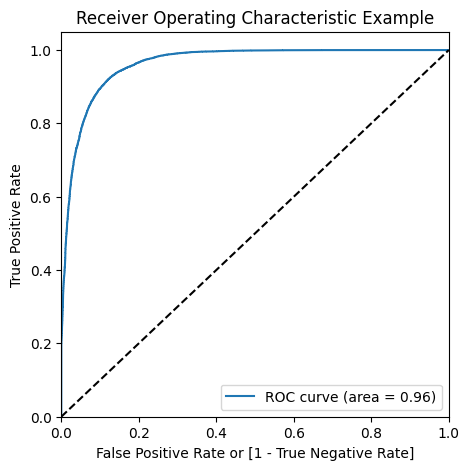

Training Accuracy: 0.90
Optimal Cutoff for Test Data: 0.50
Test Accuracy with Optimal Cutoff: 0.88

Result DataFrame:
            age  default  housing  loan  duration  campaign  previous  \
39557 -0.477228        0        1     0  0.255636 -0.200672  3.527415   
19402 -0.369954        0        1     0  0.615816  0.859587 -0.366949   
4135  -1.228148        0        1     0  0.000874 -0.200672 -0.366949   
20287 -0.691777        0        0     0 -0.763410  0.859587 -0.366949   
3023   0.595514        0        1     0  0.457688 -0.200672 -0.366949   
...         ...      ...      ...   ...       ...       ...       ...   
15267  1.453708        0        1     0 -1.097236  0.506167 -0.366949   
10301 -0.691777        0        0     0  0.361054 -0.200672 -0.366949   
24936  1.131886        0        1     0  0.132647 -0.554092 -0.366949   
1304  -0.799051        0        1     0 -0.051835 -0.554092 -0.366949   
38394 -0.799051        0        1     0 -0.657992 -0.554092 -0.366949   

     

In [ ]:
# import pandas as pd
# import numpy as np
# import statsmodels.api as sm
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE
# from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
# from imblearn.over_sampling import SMOTE
# import matplotlib.pyplot as plt

# def preprocess_data(df):
#     X = df.drop(['y'], axis=1)
#     Y = df['y']
#     x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

#     scaler = StandardScaler()
#     x_train[['age', 'duration', 'campaign', 'previous']] = scaler.fit_transform(
#         x_train[['age', 'duration', 'campaign', 'previous']])
#     x_test[['age', 'duration', 'campaign', 'previous']] = scaler.transform(
#         x_test[['age', 'duration', 'campaign', 'previous']])

#     return x_train, x_test, y_train, y_test

# def oversample_smote(x_train, y_train):
#     smote = SMOTE()
#     x_train_os, y_train_os = smote.fit_resample(x_train, y_train)

#     return x_train_os, y_train_os

# def build_logistic_regression(x_train, y_train, feature_subset=None):
#     if feature_subset is not None:
#         x_train_sm = sm.add_constant(x_train[feature_subset])
#     else:
#         x_train_sm = sm.add_constant(x_train)

#     logm = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
#     res = logm.fit()

#     return res, x_train_sm

# def evaluate_model(y_true, y_pred, threshold=0.5):
#     y_pred_final = (y_pred > threshold).astype(int)
#     confusion = confusion_matrix(y_true, y_pred_final)
#     accuracy = accuracy_score(y_true, y_pred_final)
#     precision = precision_score(y_true, y_pred_final)
#     recall = recall_score(y_true, y_pred_final)
#     f1 = f1_score(y_true, y_pred_final)

#     print("\nConfusion Matrix:")
#     print(confusion)
#     print("\nMetrics:")
#     print(f"Accuracy: {accuracy:.2f}")
#     print(f"Precision: {precision:.2f}")
#     print(f"Recall: {recall:.2f}")
#     print(f"F1 Score: {f1:.2f}")

#     return confusion, accuracy

# def draw_roc_curve(actual, probs):
#     fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
#     auc_score = auc(fpr, tpr)
#     plt.figure(figsize=(5, 5))
#     plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic Example')
#     plt.legend(loc='lower right')
#     plt.show()

# def main():
#     df = df2
#     x_train, x_test, y_train, y_test = preprocess_data(df)
#     x_train_os, y_train_os = oversample_smote(x_train, y_train)

#     # Build logistic regression model
#     rfe_support, selected_features = select_features_rfe(x_train_os, y_train_os)
#     log_model, x_train_sm = build_logistic_regression(x_train_os, y_train_os, feature_subset=selected_features)

#     # Display model parameters
#     model_params = {k: v for k, v in log_model.params.items()}
#     print("Model Parameters:")
#     for key, value in model_params.items():
#         print(f"{key}: {value}")

#     # Evaluate model on training data
#     y_train_pred = log_model.predict(x_train_sm)
#     confusion_train, accuracy_train = evaluate_model(y_train_os, y_train_pred)

#     # Draw ROC curve
#     draw_roc_curve(y_train_os, y_train_pred)

#     # Find optimal cutoff
#     cutoff_df = find_optimal_cutoff(y_train_os, y_train_pred)
#     optimal_cutoff = cutoff_df.loc[cutoff_df['accuracy'].idxmax()]['prob']

#     # Evaluate model on test data
#     x_test_selected = x_test[selected_features]
#     x_test_sm = sm.add_constant(x_test_selected)
#     y_test_pred = log_model.predict(x_test_sm)

#     # Evaluate final model on test data with optimal cutoff
#     y_pred_final = pd.DataFrame({'predict': (y_test_pred > optimal_cutoff).astype(int)}, index=y_test.index)
#     accuracy_test = accuracy_score(y_test, y_pred_final['predict'])
#     y_pred_final = pd.concat([x_test, y_test, y_pred_final], axis=1)


#     print(f"Training Accuracy: {accuracy_train:.2f}")
#     print(f"Optimal Cutoff for Test Data: {optimal_cutoff:.2f}")
#     print(f"Test Accuracy with Optimal Cutoff: {accuracy_test:.2f}")

#     return y_pred_final

# if __name__ == "__main__":
#     result_df = main()
#     print("\nResult DataFrame:")
#     print(result_df)

# **PHÂN TÍCH HIỆU SUẤT - SO SÁNH VỚI THUẬT TOÁN KHÁC**

In [ ]:
# Biến độc lập (tất cả các biến trừ biến 'y') và biến phụ thuộc y
X = df2.drop(['y'],1)
Y = df2['y']

<ipython-input-38-bb8d2a14e308>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [ ]:
#Chia bộ dữ liệu thành tập train và tập test
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=123)

In [ ]:
scaler = StandardScaler()

x_train[['age','duration','campaign','previous']] = scaler.fit_transform(x_train[['age','duration','campaign','previous']])

In [ ]:
x_train.shape, y_train.shape

((18392, 33), (18392,))

In [ ]:
y_train.value_counts()

0    16983
1     1409
Name: y, dtype: int64

### **Decision Tree Classifier**

In [ ]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train, y_train.ravel())

dtc_predict_test = dtc.predict(x_test)

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, dtc_predict_test, labels = [1, 0])))
print("")

accuracy_dtc = metrics.accuracy_score(y_test, dtc_predict_test)
print("Accuracy: {0:.4f}".format(accuracy_dtc))
print()

print("Classification Report")
print(metrics.classification_report(y_test, dtc_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 428  201]
 [1611 5643]]

Accuracy: 0.7701

Classification Report
              precision    recall  f1-score   support

           1       0.21      0.68      0.32       629
           0       0.97      0.78      0.86      7254

    accuracy                           0.77      7883
   macro avg       0.59      0.73      0.59      7883
weighted avg       0.91      0.77      0.82      7883



### **Support Vector Machine Classifier**

In [ ]:
from sklearn import svm

svmc = svm.SVC()
svmc.fit(x_train, y_train.ravel())

svmc_predict_test = svmc.predict(x_test)

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, svmc_predict_test, labels = [1, 0])))
print("")

accuracy_svmc = metrics.accuracy_score(y_test, svmc_predict_test)
print("Accuracy: {0:.4f}".format(accuracy_svmc))
print()

print("Classification Report")
print(metrics.classification_report(y_test, svmc_predict_test, labels = [1, 0]))

Confusion Matrix
[[   0  629]
 [   0 7254]]

Accuracy: 0.9202

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       629
           0       0.92      1.00      0.96      7254

    accuracy                           0.92      7883
   macro avg       0.46      0.50      0.48      7883
weighted avg       0.85      0.92      0.88      7883



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
results = pd.DataFrame([
    {'Algorithm' : 'Decision Tree', 'Accuracy' : accuracy_dtc*100},
    {'Algorithm' : 'Support Vector Machine', 'Accuracy' : accuracy_svmc*100}
])

results.sort_values(by=['Accuracy'], ascending=False)

,Algorithm,Accuracy
1,Support Vector Machine,92.020804
0,Decision Tree,77.013827


**Nhận xét:**
* Nhìn chung Logistic regression có độ chính xác cao accurancy = 0.8 > decision tree = 0.7. Nhưng < hơn thuật toán SVM = 0.92
* Ưu điểm có thể thấy của Thuật toán Logistic là kết quả ra sẽ biết chính xác biến X ảnh hưởng biến mục tiêu Y như thế nào vì recall của Logistic regression sẽ cao
* Có thể thấy thuật toán Logistic Regression sẽ phù hợp với những tập dữ liệu nhỏ. Do thuật toán SVM sẽ phù hợp với tập dữ liệu lớn hơn.
* Nếu dữ liệu quá lớn và quá phức tạp thì thuật toán Logistic sẽ chạy rất chậm và xác suất phân loại độ chính xác sẽ không cao và đúng.